
Corpus: J_Frequency_19th
Total Interjections: 28
Openness Counts:
openness
1      7
2      8
3      3
4     10
Name: count, dtype: int64


Corpus: J_Frequency_20th
Total Interjections: 15
Openness Counts:
openness
1     3
2     6
3     2
4     4
Name: count, dtype: int64


Corpus: T_Frequency_19th
Total Interjections: 70
Openness Counts:
openness
1     22
2     17
3      9
4     22
Name: count, dtype: int64


Corpus: T_Frequency_20th
Total Interjections: 56
Openness Counts:
openness
1     11
2     20
3      6
4     19
Name: count, dtype: int64


Chi-Square Test: p-value = 0.6090109854489749


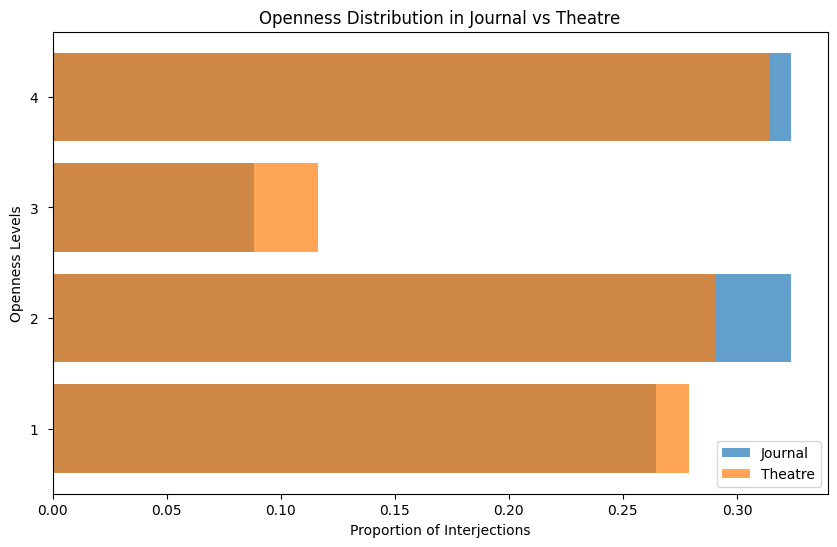

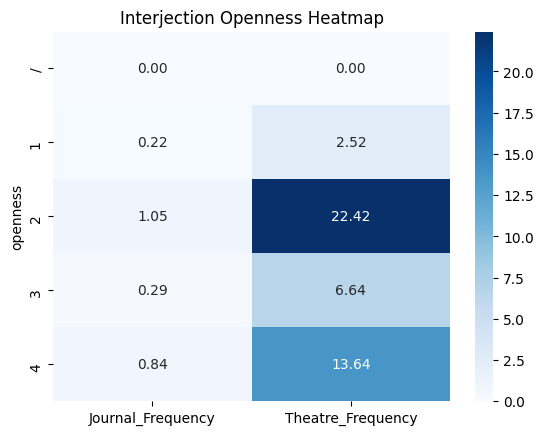

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 读取感叹词数据
df = pd.read_csv('interjection_stat_with_frequency_centuries.csv')

# 步骤一：对比报刊和戏剧感叹词的元音开口度分布
def calculate_total_and_openness(df, columns):
    """
    计算每个文体中感叹词总数及其元音开口度分布
    """
    results = {}
    for column in columns:
        total_interjections = df[df[column] > 0]['Interjection'].count()
        openness_counts = df[df[column] > 0]['openness'].value_counts().sort_index()
        results[column] = {'total': total_interjections, 'openness': openness_counts}
    return results

# 报刊和戏剧列
columns = ['J_Frequency_19th', 'J_Frequency_20th', 'T_Frequency_19th', 'T_Frequency_20th']

# 计算感叹词总数和开口度分布
results = calculate_total_and_openness(df, columns)

# 打印结果
for corpus, data in results.items():
    print(f"\nCorpus: {corpus}")
    print(f"Total Interjections: {data['total']}")
    print(f"Openness Counts:\n{data['openness']}\n")

# 步骤二：统计分析
# 合并报刊和戏剧的开口度数据用于统计检验
df['Journal_Frequency'] = df['J_Frequency_19th'] + df['J_Frequency_20th']
df['Theatre_Frequency'] = df['T_Frequency_19th'] + df['T_Frequency_20th']

# 仅保留出现频率大于0的感叹词
df_journal = df[df['Journal_Frequency'] > 0]
df_theatre = df[df['Theatre_Frequency'] > 0]

# 卡方检验或 Fisher 精确检验
contingency_table = pd.crosstab(df['openness'], [df['Journal_Frequency'] > 0, df['Theatre_Frequency'] > 0])

chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
print(f"\nChi-Square Test: p-value = {p_value}")

# 步骤三：可视化
def plot_stacked_bar(df, columns, labels):
    """
    绘制堆叠柱状图，比较报刊与戏剧的开口度分布
    """
    openness_labels = ['High Openness (3, 4)', 'Low Openness (1, 2)']
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for i, column in enumerate(columns):
        openness_distribution = df[df[column] > 0]['openness'].value_counts(normalize=True).sort_index()
        ax.barh(openness_distribution.index, openness_distribution, label=labels[i], alpha=0.7)

    ax.set_xlabel('Proportion of Interjections')
    ax.set_ylabel('Openness Levels')
    ax.set_title('Openness Distribution in Journal vs Theatre')
    ax.legend()
    plt.show()

# 调用函数绘制堆叠柱状图
plot_stacked_bar(df, ['Journal_Frequency', 'Theatre_Frequency'], ['Journal', 'Theatre'])

# 热图展示
def plot_heatmap(df, columns):
    """
    绘制报刊和戏剧中感叹词的元音开口度热图
    """
    heatmap_data = pd.pivot_table(df, values=columns, index='openness')
    sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='.2f')
    plt.title('Interjection Openness Heatmap')
    plt.show()

# 调用函数绘制热图
plot_heatmap(df, ['Journal_Frequency', 'Theatre_Frequency'])



Corpus: J_Frequency_19th
Total Interjections (Normalized): 1.0668292311209326
Openness Counts (Normalized):
openness
1    0.266707
2    0.304808
3    0.114303
4    0.381010
Name: count, dtype: float64


Corpus: J_Frequency_20th
Total Interjections (Normalized): 0.4233436386150548
Openness Counts (Normalized):
openness
1    0.117595
2    0.117595
3    0.082317
4    0.105836
Name: count, dtype: float64


Corpus: T_Frequency_19th
Total Interjections (Normalized): 2.3001120483154964
Openness Counts (Normalized):
openness
1    0.722892
2    0.558599
3    0.295729
4    0.722892
Name: count, dtype: float64


Corpus: T_Frequency_20th
Total Interjections (Normalized): 2.565394658481836
Openness Counts (Normalized):
openness
1    0.503917
2    0.916212
3    0.274864
4    0.870402
Name: count, dtype: float64


Chi-Square Test: p-value = 0.3668515314942907


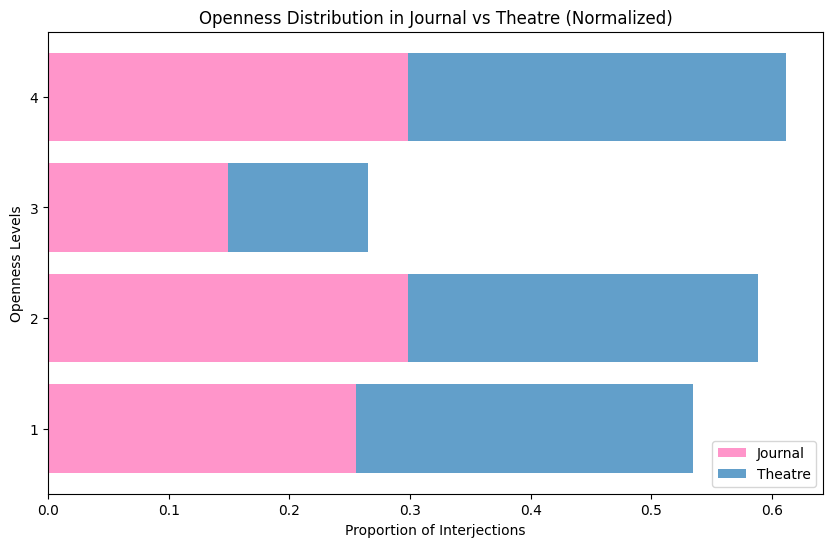

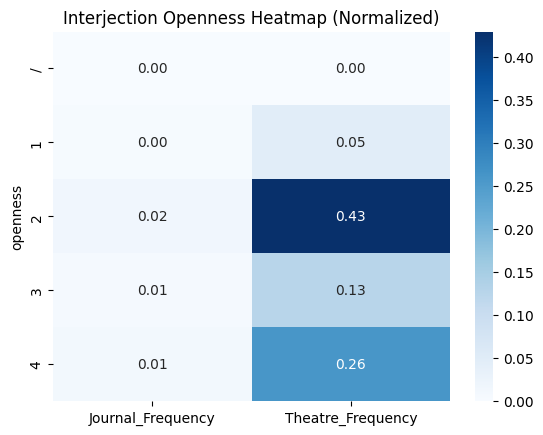

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 读取感叹词数据
df = pd.read_csv('New_interjection_stat_with_frequency_centuries.csv')

# 语料库的总字数
word_counts = {
    'J_Frequency_19th': 262460,  # 19世纪报刊
    'J_Frequency_20th': 850373,  # 20世纪报刊
    'T_Frequency_19th': 304333,  # 19世纪戏剧
    'T_Frequency_20th': 218290   # 20世纪戏剧
}

# 步骤一：对比报刊和戏剧感叹词的元音开口度分布
def calculate_total_and_openness(df, columns, word_counts):
    """
    计算每个文体中感叹词总数及其元音开口度分布，并进行标准化
    """
    results = {}
    for column in columns:
        total_interjections = df[df[column] > 0]['Interjection'].count()
        openness_counts = df[df[column] > 0]['openness'].value_counts().sort_index()
        
        # 标准化感叹词的使用频率为每10,000个单词中的频率
        total_interjections_normalized = (total_interjections / word_counts[column]) * 10000
        openness_counts_normalized = (openness_counts / word_counts[column]) * 10000
        
        results[column] = {
            'total': total_interjections_normalized, 
            'openness': openness_counts_normalized
        }
    return results

# 报刊和戏剧列
columns = ['J_Frequency_19th', 'J_Frequency_20th', 'T_Frequency_19th', 'T_Frequency_20th']

# 计算感叹词总数和开口度分布，并进行标准化
results = calculate_total_and_openness(df, columns, word_counts)

# 打印结果
for corpus, data in results.items():
    print(f"\nCorpus: {corpus}")
    print(f"Total Interjections (Normalized): {data['total']}")
    print(f"Openness Counts (Normalized):\n{data['openness']}\n")

# 步骤二：统计分析
# 合并报刊和戏剧的开口度数据用于统计检验
df['Journal_Frequency'] = (df['J_Frequency_19th'] + df['J_Frequency_20th']) / (word_counts['J_Frequency_19th'] + word_counts['J_Frequency_20th']) * 10000
df['Theatre_Frequency'] = (df['T_Frequency_19th'] + df['T_Frequency_20th']) / (word_counts['T_Frequency_19th'] + word_counts['T_Frequency_20th']) * 10000

# 仅保留出现频率大于0的感叹词
df_journal = df[df['Journal_Frequency'] > 0]
df_theatre = df[df['Theatre_Frequency'] > 0]

# 卡方检验或 Fisher 精确检验
contingency_table = pd.crosstab(df['openness'], [df['Journal_Frequency'] > 0, df['Theatre_Frequency'] > 0])

chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
print(f"\nChi-Square Test: p-value = {p_value}")

# 步骤三：可视化
def plot_stacked_bar(df, columns, labels):
    """
    绘制堆叠柱状图，比较报刊与戏剧的开口度分布（已标准化）
    """
    # 定义粉色和蓝色
    colors = ['#ff69b4', '#1f77b4']  # 粉色和蓝色

    fig, ax = plt.subplots(figsize=(10, 6))
    
    # 初始化一个用于记录累积值的变量
    cum_values = pd.Series([0] * len(df['openness'].unique()), index=sorted(df['openness'].unique()))
    
    for i, column in enumerate(columns):
        # 计算元音开口度分布
        openness_distribution = df[df[column] > 0]['openness'].value_counts(normalize=True).sort_index()
        
        # 绘制堆叠柱状图，并在之前的基础上进行堆叠
        ax.barh(openness_distribution.index, openness_distribution, label=labels[i], 
                color=colors[i], alpha=0.7, left=cum_values[openness_distribution.index])
        
        # 更新累积值，确保后续数据集堆叠在前一组数据上
        cum_values[openness_distribution.index] += openness_distribution

    ax.set_xlabel('Proportion of Interjections')
    ax.set_ylabel('Openness Levels')
    ax.set_title('Openness Distribution in Journal vs Theatre (Normalized)')
    ax.legend()
    plt.show()


# 调用函数绘制堆叠柱状图
plot_stacked_bar(df, ['Journal_Frequency', 'Theatre_Frequency'], ['Journal', 'Theatre'])

# 热图展示
def plot_heatmap(df, columns):
    """
    绘制报刊和戏剧中感叹词的元音开口度热图（已标准化）
    """
    heatmap_data = pd.pivot_table(df, values=columns, index='openness')
    sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='.2f')
    plt.title('Interjection Openness Heatmap (Normalized)')
    plt.show()

# 调用函数绘制热图
plot_heatmap(df, ['Journal_Frequency', 'Theatre_Frequency'])


### 预检验

In [9]:
import pandas as pd
from scipy import stats

# 读取感叹词数据
df = pd.read_csv('New_interjection_stat_with_frequency_centuries.csv')

# 合并19世纪和20世纪数据，分别求报刊和戏剧的总频次
df['Journal_Total'] = df['J_Frequency_19th'] + df['J_Frequency_20th']
df['Theatre_Total'] = df['T_Frequency_19th'] + df['T_Frequency_20th']

# 构建列联表，按照元音开口度进行分组
contingency_table = pd.crosstab(df['openness'], [df['Journal_Total'] > 0, df['Theatre_Total'] > 0])

# 打印列联表，方便查看
print("列联表：")
print(contingency_table)

# 进行预检验，检查卡方检验的适用性
try:
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    # 输出卡方检验的结果
    print("\n卡方检验结果：")
    print(f"Chi2 统计量 = {chi2}")
    print(f"p-value = {p_value}")
    print(f"自由度 (dof) = {dof}")

    # 输出期望频次表
    print("\n期望频次表：")
    print(expected)

    # 检查期望频次是否有小于5的情况
    if (expected < 5).any():
        print("\n警告：有期望频次小于5，建议使用 Fisher 精确检验。")
        # 进行 Fisher 精确检验
        _, fisher_p_value = stats.fisher_exact(contingency_table)
        print(f"Fisher 精确检验 p-value: {fisher_p_value}")
    else:
        print("\n卡方检验适用，期望频次均大于5。")

except ValueError as e:
    print(f"卡方检验出错: {e}")
    print("尝试进行 Fisher 精确检验...")

    # 如果卡方检验出错，使用 Fisher 精确检验
    _, fisher_p_value = stats.fisher_exact(contingency_table)
    print(f"Fisher 精确检验 p-value: {fisher_p_value}")


列联表：
Journal_Total False       True       
Theatre_Total False True  False True 
openness                             
/                 5     0     0     0
1                70    14     2    10
2                30    13     2    12
3                18     3     0     7
4                45    15     2    12

卡方检验结果：
Chi2 统计量 = 13.030171173177317
p-value = 0.3668515314942907
自由度 (dof) = 12

期望频次表：
[[ 3.23076923  0.86538462  0.11538462  0.78846154]
 [62.03076923 16.61538462  2.21538462 15.13846154]
 [36.83076923  9.86538462  1.31538462  8.98846154]
 [18.09230769  4.84615385  0.64615385  4.41538462]
 [47.81538462 12.80769231  1.70769231 11.66923077]]

警告：有期望频次小于5，建议使用 Fisher 精确检验。
卡方检验出错: The input `table` must be of shape (2, 2).
尝试进行 Fisher 精确检验...


ValueError: The input `table` must be of shape (2, 2).

In [11]:
import pandas as pd
from scipy import stats

# 读取感叹词数据
df = pd.read_csv('New_interjection_stat_with_frequency_centuries.csv')

# 去除openness列中包含‘/’的行
df = df[df['openness'] != '/']

# 合并19世纪和20世纪数据，分别求报刊和戏剧的总频次
df['Journal_Total'] = df['J_Frequency_19th'] + df['J_Frequency_20th']
df['Theatre_Total'] = df['T_Frequency_19th'] + df['T_Frequency_20th']

# 合并开口度的类别为 'low' 和 'high'
df['openness_combined'] = df['openness'].replace({1: 'low', 2: 'low', 3: 'high', 4: 'high'})

# 构建新的列联表，并限制列联表为2x2
contingency_table_2x2 = pd.crosstab(df['openness_combined'], [df['Journal_Total'] > 0, df['Theatre_Total'] > 0])

# 打印列联表的大小，确保它是 2x2
print(f"列联表大小: {contingency_table_2x2.shape}")

# 如果表格不是2x2，说明有错误
if contingency_table_2x2.shape != (2, 2):
    print("错误：生成的列联表不是2x2。请检查数据处理步骤。")
else:
    # 进行 Fisher 精确检验
    _, fisher_p_value = stats.fisher_exact(contingency_table_2x2)
    print(f"Fisher 精确检验 p-value: {fisher_p_value}")


列联表大小: (4, 4)
错误：生成的列联表不是2x2。请检查数据处理步骤。


In [12]:
print(contingency_table_2x2)

Journal_Total     False       True       
Theatre_Total     False True  False True 
openness_combined                        
1                    70    14     2    10
2                    30    13     2    12
3                    18     3     0     7
4                    45    15     2    12


In [17]:
import pandas as pd
from scipy import stats

# 读取感叹词数据
df = pd.read_csv('New_interjection_stat_with_frequency_centuries.csv')

# 确保openness列为整数类型

# 去除openness列中包含‘/’的行
df = df[df['openness'] != '/']
df['openness'] = pd.to_numeric(df['openness'], errors='coerce').astype(int)


# 合并19世纪和20世纪数据，分别求报刊和戏剧的总频次
df['Journal_Total'] = df['J_Frequency_19th'] + df['J_Frequency_20th']
df['Theatre_Total'] = df['T_Frequency_19th'] + df['T_Frequency_20th']

# 合并开口度为 'low' 和 'high'
df['openness_combined'] = df['openness'].replace({1: 'low', 2: 'low', 3: 'high', 4: 'high'})

# 检查是否成功替换为 low 和 high
print(df[['openness', 'openness_combined']].head())

# 创建一个二分类变量，表示 Journal_Total 和 Theatre_Total 是否有频次
df['Total_Presence'] = (df['Journal_Total'] > 0) & (df['Theatre_Total'] > 0)

# 构建新的列联表，确保只有 'low' 和 'high' 作为开口度类别
contingency_table_2x2 = pd.crosstab(df['openness_combined'], df['Total_Presence'])

# 打印生成的2x2列联表
print("生成的2x2列联表:")
print(contingency_table_2x2)

# 确保列联表是2x2
if contingency_table_2x2.shape == (2, 2):
    # 进行 Fisher 精确检验
    _, fisher_p_value = stats.fisher_exact(contingency_table_2x2)
    print(f"Fisher 精确检验 p-value: {fisher_p_value}")
else:
    print("错误：生成的列联表不是2x2")


   openness openness_combined
0         4              high
1         4              high
2         4              high
3         4              high
4         4              high
生成的2x2列联表:
Total_Presence     False  True 
openness_combined              
high                  83     19
low                  131     22
Fisher 精确检验 p-value: 0.38788954595812786


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 读取感叹词数据
df = pd.read_csv('New_interjection_stat_with_frequency_centuries.csv')

# 语料库总字数
word_counts = {
    'J_Frequency_19th': 262460,
    'J_Frequency_20th': 850373,
    'T_Frequency_19th': 304333,
    'T_Frequency_20th': 218290
}

# 步骤 1：标准化感叹词频率
for corpus, total_words in word_counts.items():
    column_name = f'{corpus}_Freq_Standardized'
    df[column_name] = (df[corpus] / total_words) * 10000

# 步骤 2：清理非数字的元音开口度
df['openness'] = pd.to_numeric(df['openness'], errors='coerce')

# 去掉 NaN 值的行
df_cleaned = df.dropna(subset=['openness'])

# 步骤 3：将元音开口度分为高（3, 4）和低（1, 2），并且处理可能的 NaN
df_cleaned['Openness_Category'] = df_cleaned['openness'].apply(lambda x: 'High' if pd.notna(x) and int(x) >= 3 else 'Low')

# 步骤 4：合并报刊和戏剧的频率
df_cleaned['Journal_Frequency'] = df_cleaned['J_Frequency_19th_Freq_Standardized'] + df_cleaned['J_Frequency_20th_Freq_Standardized']
df_cleaned['Theatre_Frequency'] = df_cleaned['T_Frequency_19th_Freq_Standardized'] + df_cleaned['T_Frequency_20th_Freq_Standardized']

# 步骤 5：构建列联表
df_cleaned['Journal_Interjection_Present'] = df_cleaned['Journal_Frequency'] > 0
df_cleaned['Theatre_Interjection_Present'] = df_cleaned['Theatre_Frequency'] > 0

contingency_table = pd.crosstab(df_cleaned['Openness_Category'], 
                                [df_cleaned['Journal_Interjection_Present'], df_cleaned['Theatre_Interjection_Present']])

# 输出列联表
print("\nContingency Table:")
print(contingency_table)

# 步骤 6：进行 Fisher 精确检验
# 将 Journal 和 Theatre 的感叹词频率分成 High/Low 开口度
journal_table = pd.crosstab(df_cleaned['Openness_Category'], df_cleaned['Journal_Interjection_Present'])
theatre_table = pd.crosstab(df_cleaned['Openness_Category'], df_cleaned['Theatre_Interjection_Present'])

# Fisher 检验
_, journal_p_value = stats.fisher_exact(journal_table)
_, theatre_p_value = stats.fisher_exact(theatre_table)

# 输出 Fisher 精确检验结果
print(f"\nJournal Fisher Exact Test: p-value = {journal_p_value}")
print(f"Theatre Fisher Exact Test: p-value = {theatre_p_value}")



Contingency Table:
Journal_Interjection_Present False       True       
Theatre_Interjection_Present False True  False True 
Openness_Category                                   
High                            63    18     2    19
Low                            100    27     4    22

Journal Fisher Exact Test: p-value = 0.5113027791262175
Theatre Fisher Exact Test: p-value = 0.5013586043892899


/var/folders/mt/d148h58s6ts989cfbq0vfyth0000gn/T/ipykernel_9968/2620419030.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Openness_Category'] = df_cleaned['openness'].apply(lambda x: 'High' if pd.notna(x) and int(x) >= 3 else 'Low')
/var/folders/mt/d148h58s6ts989cfbq0vfyth0000gn/T/ipykernel_9968/2620419030.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Journal_Frequency'] = df_cleaned['J_Frequency_19th_Freq_Standardized'] + df_cleaned['J_Frequency_20th_Freq_Standardized']

### 预检验：是否可以进行卡方检验


In [2]:
import pandas as pd
from scipy import stats

df = pd.read_csv('New_interjection_stat_with_frequency_centuries.csv')
# 计算卡方检验的预期频次
contingency_table = pd.crosstab(df['openness'], [df['Journal_Frequency'] > 0, df['Theatre_Frequency'] > 0])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# 检查期望频数是否大于5
print("期望频次表:")
print(expected)
print("\n是否有期望频数小于5: ", (expected < 5).any())

# 如果所有期望频次大于5，可以进行卡方检验
if not (expected < 5).any():
    print(f"卡方检验可以进行，p值 = {p_value}")
else:
    print("期望频次较低，考虑使用 Fisher 精确检验。")
    # 进行 Fisher 精确检验
    _, fisher_p_value = stats.fisher_exact(contingency_table)
    print(f"Fisher 精确检验 p值 = {fisher_p_value}")


KeyError: 'Journal_Frequency'

In [3]:
import pandas as pd
from scipy import stats

# 创建数据
df = pd.read_csv('New_interjection_stat_with_frequency_centuries.csv')

# 转换为DataFrame


# 合并19世纪和20世纪数据，分别求报刊和戏剧的总频次
df['Journal_Total'] = df['J_Frequency_19th'] + df['J_Frequency_20th']
df['Theatre_Total'] = df['T_Frequency_19th'] + df['T_Frequency_20th']

# 按照元音开口度统计感叹词的频率
journal_openness = df.groupby('openness')['Journal_Total'].sum()
theatre_openness = df.groupby('openness')['Theatre_Total'].sum()

# 创建列联表：不同开口度在报刊和戏剧中的频次
contingency_table = pd.DataFrame({
    'Journal': journal_openness,
    'Theatre': theatre_openness
})

# 进行卡方检验
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# 输出卡方检验结果
print("卡方检验结果：")
print(f"Chi2 统计量 = {chi2}")
print(f"p-value = {p_value}")
print(f"自由度 (dof) = {dof}")

# 输出期望频次表
print("\n期望频次表：")
print(expected)

# 检查期望频次是否有小于5的情况
if (expected < 5).any():
    print("\n警告：期望频次中有值小于5，建议使用Fisher精确检验。")
else:
    print("\n期望频次均大于5，可以进行卡方检验。")


ValueError: The internally computed table of expected frequencies has a zero element at (0, 0).

In [4]:
import pandas as pd
from scipy import stats

# 1. 读取数据
df = pd.read_csv('New_interjection_stat_with_frequency_centuries.csv')

# 2. 合并19世纪和20世纪数据，分别求报刊和戏剧的总频次
df['Journal_Total'] = df['J_Frequency_19th'] + df['J_Frequency_20th']
df['Theatre_Total'] = df['T_Frequency_19th'] + df['T_Frequency_20th']

# 3. 按照元音开口度统计感叹词的频率，并去除零频次的行
df_non_zero = df[(df['Journal_Total'] > 0) | (df['Theatre_Total'] > 0)]

# 4. 构建列联表，按照元音开口度进行分组
contingency_table = df_non_zero.groupby('openness')[['Journal_Total', 'Theatre_Total']].sum()

# 打印列联表，方便查看
print("列联表：")
print(contingency_table)

# 5. Fisher 精确检验（如果列联表为2x2或者较大表也可以使用）
# 检查列联表是否是2x2，如果不是，使用“alternative”参数
if contingency_table.shape == (2, 2):
    _, fisher_p_value = stats.fisher_exact(contingency_table)
else:
    _, fisher_p_value = stats.fisher_exact(contingency_table, alternative='two-sided')

# 6. 输出结果
print(f"Fisher 精确检验 p-value: {fisher_p_value}")


列联表：
          Journal_Total  Theatre_Total
openness                              
1                    37            242
2                   100           1278
3                    21            186
4                    92           1009


ValueError: The input `table` must be of shape (2, 2).

In [5]:
# 直接使用卡方检验，保留所有零频次的数据
contingency_table = df.groupby('openness')[['Journal_Total', 'Theatre_Total']].sum()

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("卡方检验结果：")
print(f"Chi2 统计量 = {chi2}")
print(f"p-value = {p_value}")
print(f"自由度 (dof) = {dof}")


ValueError: The internally computed table of expected frequencies has a zero element at (0, 0).